In [1]:
import proplot as plot

import meds
import numpy as np

In [2]:
from ngmix.medsreaders import MultiBandNGMixMEDS, NGMixMEDS

mlist = {
    b: NGMixMEDS("/Users/beckermr/Downloads/DES2359-6331_r5227p01_%s_pizza-cutter-slices.fits.fz" % b)
    for b in "riz"
}

In [3]:
mbm = MultiBandNGMixMEDS(mlist=list(mlist.values()))

In [13]:
import yaml

with open("metadetect-v3.yaml", "r") as fp:
    config = yaml.safe_load(fp.read())
    
preconfig = config.pop("pizza-cutter-preprocessing")

In [14]:
from pizza_cutter_metadetect.run_metadetect import _do_metadetect, _load_gaia_stars

gaia_stars = _load_gaia_stars(mbm, preconfig)

  0%|          | 0/1 [00:00<?, ?it/s]

9742


DEBUG:ngmix.fitting.leastsqbound:bad covariance matrix
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:     -333       657    -0.301   -0.0846  3.14e+05      1.03 
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:      293      -343    -0.615     0.475  3.71e+05     0.612 
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:     98.3  2.29e+03     0.696    -0.635  3.73e+05         1 
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:     8.73      -718     0.882    -0.377  3.65e+05     0.911 
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:     11.1  -3.05e+03   -0.0655     0.777  3.75e+05      0.89 
DEBUG:ngmix.fitting.leastsqbound:bad covariance matrix
DEBUG:ngmix.fitting.leastsqbound:singular covaria

GMixRangeError: "galsim error: 'drawFFT requires an FFT that is too large.\nThe required FFT size would be 24872 x 24872, which requires 13.83 GB of memory.\nIf you can handle the large FFT, you may update gsparams.maximum_fft_size.'"

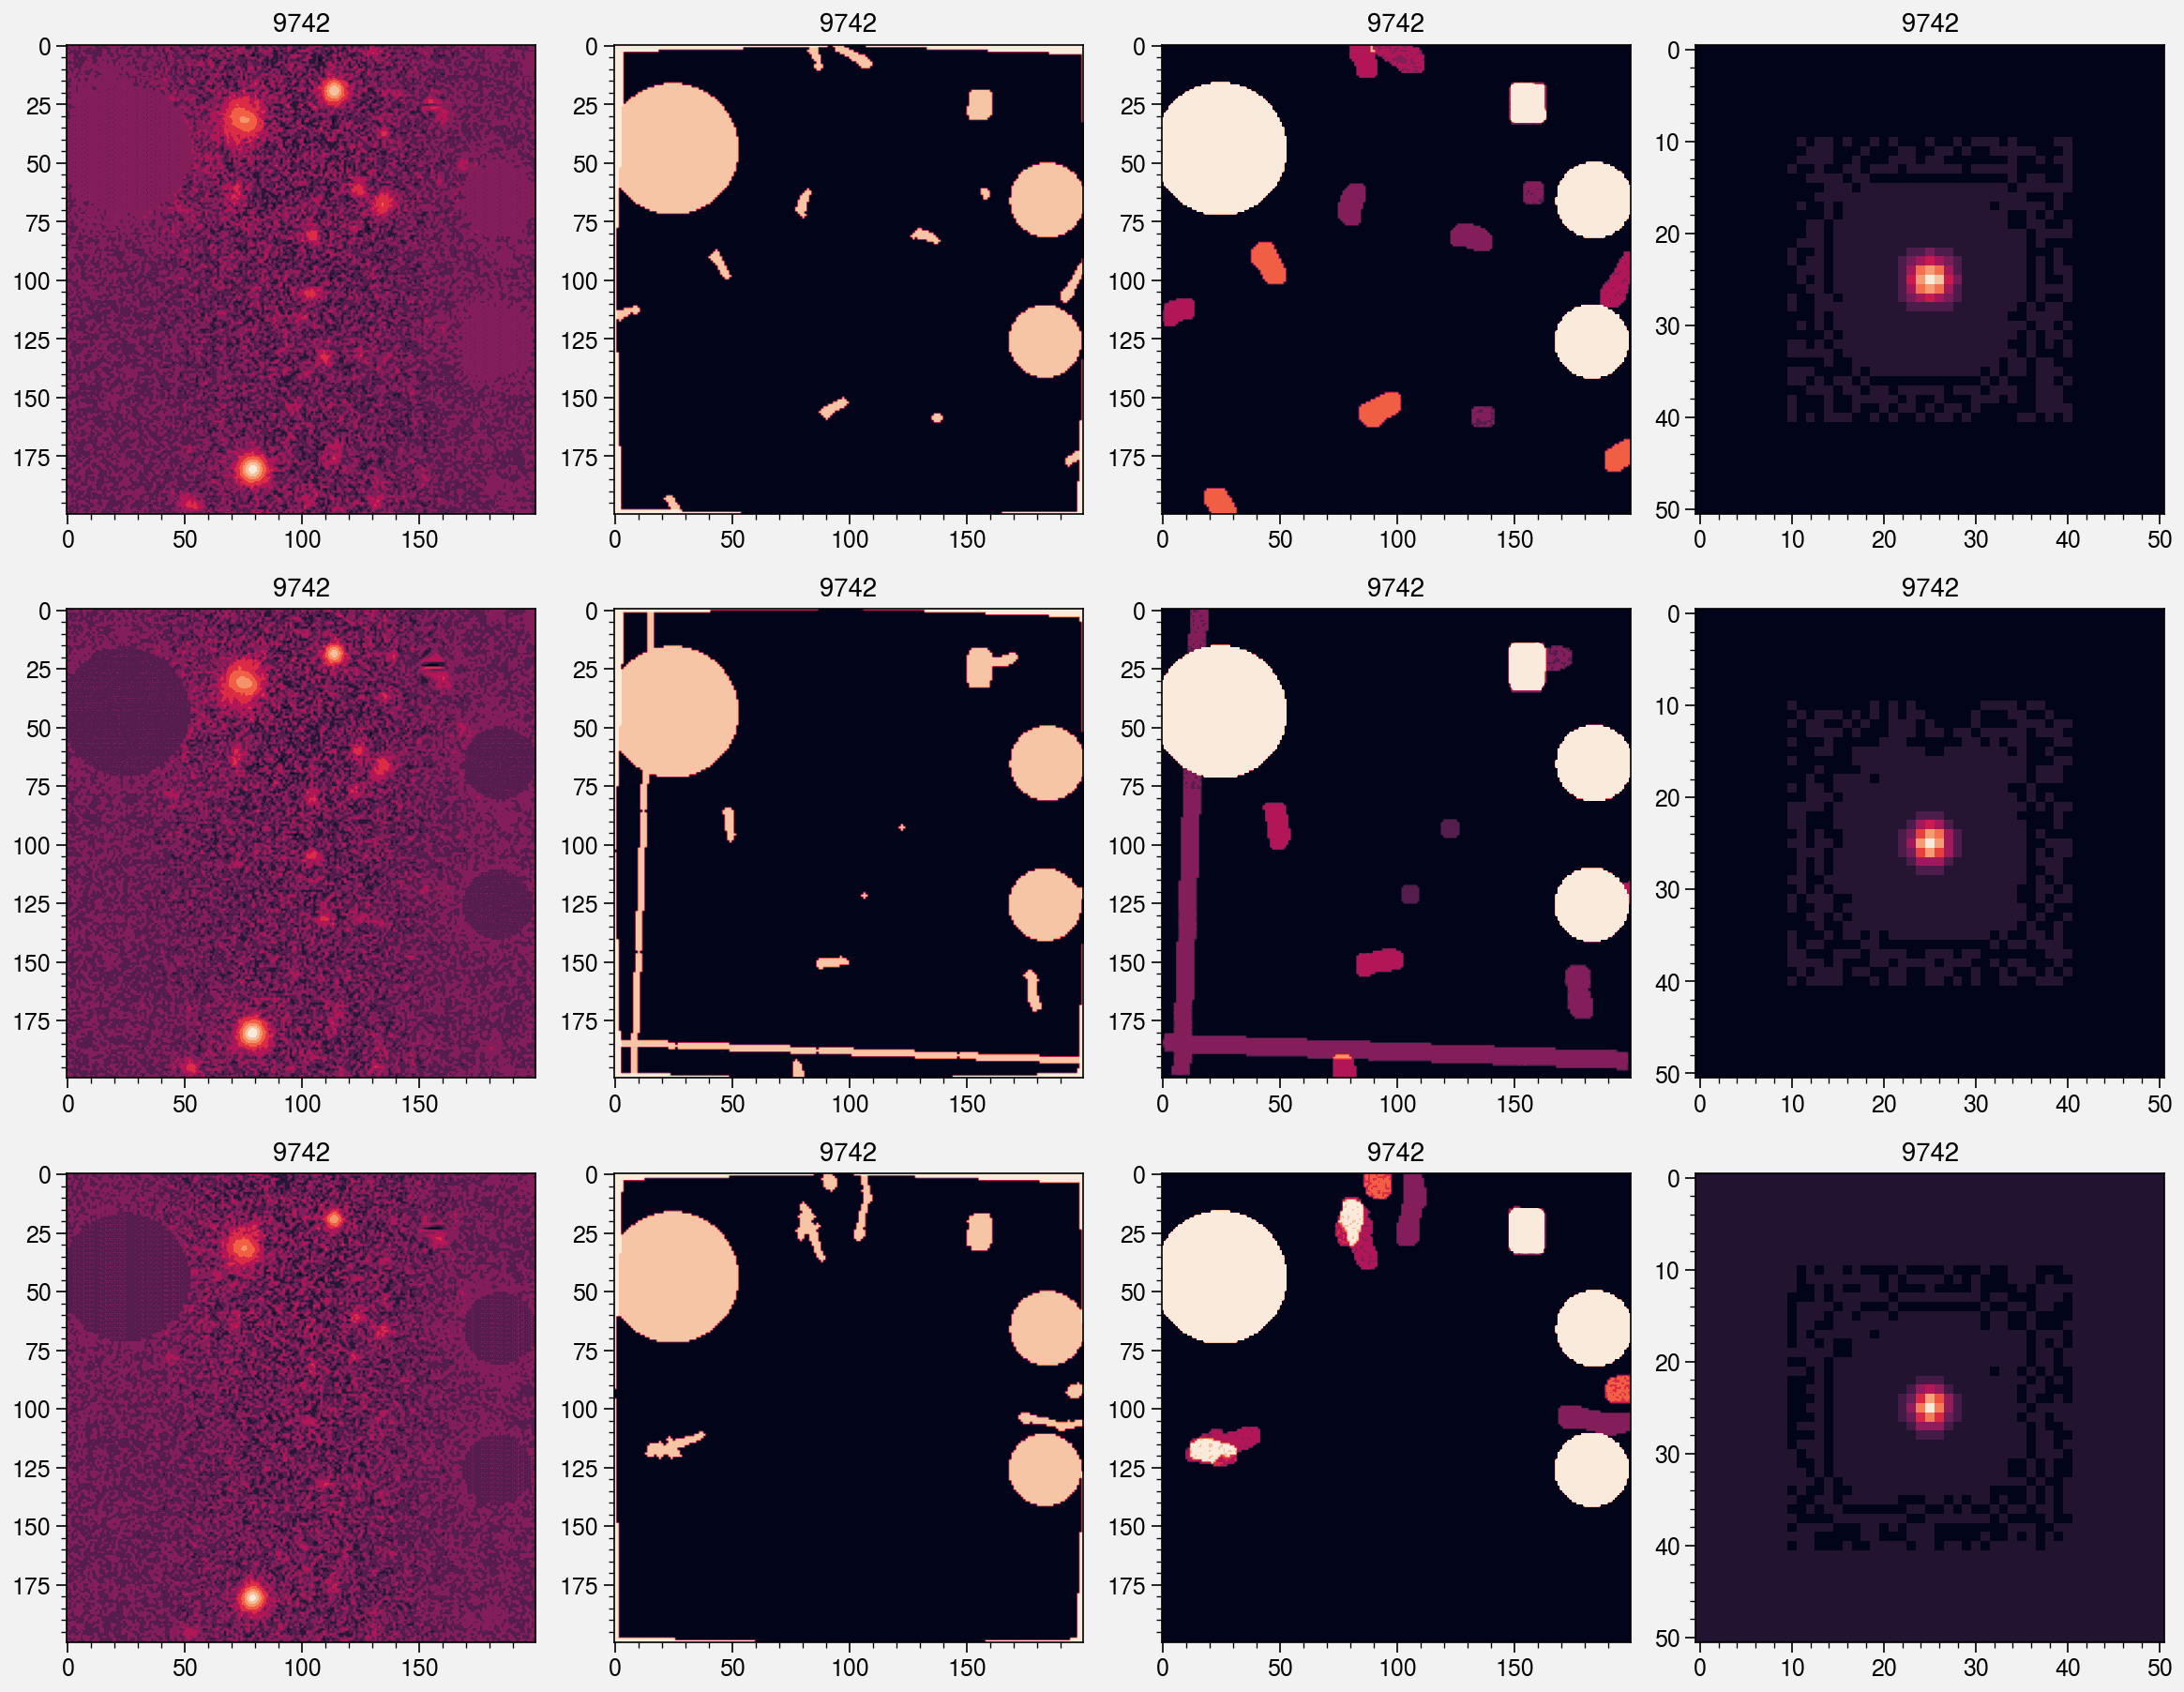

In [37]:
import tqdm

for ind in tqdm.trange(9742,9742+1):
    tqdm.tqdm.write("%d" % ind)
    mbobs = mbm.get_mbobs(ind)
    try:
         _do_metadetect(config, mbobs, gaia_stars, 413, ind, preconfig, [True, True, True])
    except Exception as e:
        fig, axs = plot.subplots(nrows=len(mlist), ncols=4, share=0)
        axs.set_title(ind)

        for i, b in enumerate("riz"):
            obs = mbobs[i][0]

            ax = axs[i, 0]
            ax.imshow(
                np.arcsinh(obs.image * np.sqrt(obs.weight)),
                cmap='rocket'
            )
            ax.grid(False)

            ax = axs[i, 1]
            ax.imshow(
                np.arcsinh(obs.bmask),
                cmap='rocket',
            )
            ax.grid(False)    

            ax = axs[i, 2]
            ax.imshow(
                obs.mfrac,
                cmap='rocket',
                vmin=0,
                vmax=0.25,
            )
            ax.grid(False)    

            ax = axs[i, 3]
            ax.imshow(
                obs.psf.image,
                cmap='rocket',
            )
            ax.grid(False)    
        raise e

In [30]:
import sys
import logging

logging.basicConfig(fp=sys.stdout)
logging.getLogger("ngmix").setLevel(logging.DEBUG)

In [38]:
from ngmix.metacal import get_all_metacal

get_all_metacal(mbobs[0][0], psf='fitgauss', rng=np.random.RandomState(seed=10))

fig, axs = plot.subplots()

axs.imshow(mbobs[0][0].image)

DEBUG:ngmix.fitting.leastsqbound:bad covariance matrix
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:     8.98  1.08e+03    -0.714     0.153  3.16e+05      1.08 
DEBUG:ngmix.fitting.leastsqbound:bad covariance matrix
DEBUG:ngmix.fitting.leastsqbound:singular covariance
DEBUG:ngmix.fitting.leastsqbound:    pars at singular:     -104  1.57e+03    -0.415     0.414  3.99e+05      0.98 


GMixRangeError: "galsim error: 'drawFFT requires an FFT that is too large.\nThe required FFT size would be 24872 x 24872, which requires 13.83 GB of memory.\nIf you can handle the large FFT, you may update gsparams.maximum_fft_size.'"

In [39]:
%debug

> /Users/beckermr/Desktop/des_y6_shear/ngmix/ngmix/metacal/metacal.py(311)get_target_image()
    309         except RuntimeError as err:
    310             # argh, galsim uses generic exceptions
--> 311             raise GMixRangeError("galsim error: '%s'" % str(err))
    312 
    313         return newim

ipdb> up
> /Users/beckermr/Desktop/des_y6_shear/ngmix/ngmix/metacal/metacal.py(173)get_obs_galshear()
    171         newpsf_image, newpsf_obj = self.get_target_psf(shear, type)
    172 
--> 173         sheared_image = self.get_target_image(newpsf_obj, shear=shear)
    174 
    175         newobs = self._make_obs(sheared_image, newpsf_image)

ipdb> up
> /Users/beckermr/Desktop/des_y6_shear/ngmix/ngmix/metacal/metacal.py(145)get_all()
    143                     obs, obs_noshear = self.get_obs_galshear(
    144                         sh,
--> 145                         get_unsheared=True
    146                     )
    147                     odict['noshear'] = obs_noshear

ipdb> 

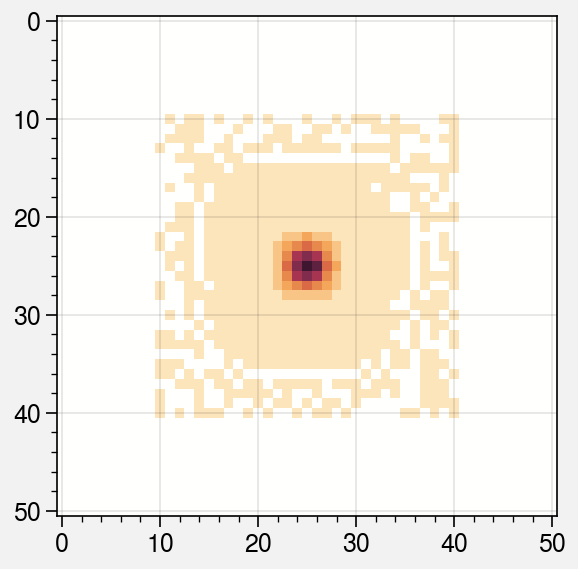

In [43]:
fig, axs = plot.subplots()
axs.imshow(np.arcsinh(mbobs[0][0].psf.image))

In [45]:
mbobs[0][0].jacobian

row0: 99.5       col0: 99.5       dvdrow: 0.26299    dvdcol: -0.00059645 dudrow: 0.00059833 dudcol: -2.9256e+05

In [62]:
np.sum(mlist['z']['dudcol'][:, 0] < -1)

2

In [53]:
mbobs = mbm.get_mbobs(9742)

In [56]:
mbobs[2][0].jacobian

row0: 99.5       col0: 99.5       dvdrow: 0.26299    dvdcol: -0.00059645 dudrow: 0.00059833 dudcol: -2.9256e+05

In [73]:
for col in mlist['z'][9742:9742+1].dtype.names:
    print(col, mlist['z'][9742:9742+1][col])

id [9742]
box_size [200]
ra [0.00011277]
dec [-63.16140188]
ncutout [1]
file_id [[0 0]]
start_row [[388840000     -9999]]
orig_row [[ 9899.5 -9999. ]]
orig_col [[ 4099.5 -9999. ]]
orig_start_row [[ 9800 -9999]]
orig_start_col [[ 4000 -9999]]
cutout_row [[   99.5 -9999. ]]
cutout_col [[   99.5 -9999. ]]
dudrow [[ 5.98327102e-04 -9.99900000e+03]]
dudcol [[-292557.96152192   -9999.        ]]
dvdrow [[ 2.6298888e-01 -9.9990000e+03]]
dvdcol [[-5.96452846e-04 -9.99900000e+03]]
nepoch [8]
nepoch_eff [6.58640575]
psf_box_size [51]
psf_cutout_row [[25. 25.]]
psf_cutout_col [[25. 25.]]
psf_sigma [[ 3.3430073e+00 -9.9990000e+03]]
psf_start_row [[25284321    -9999]]
